In [1]:
pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 10.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ipywidgets]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import warnings
import re

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [3]:
basepath = "../data/"

In [ ]:
suitability_county = pd.read_csv(basepath + "suitability_scores/suitability_scores_county.csv", dtype={"GEOID": str})
suitability_block_group = pd.read_csv(basepath + "suitability_scores/suitability_scores_bg.csv", dtype={"GEOID": str})
project_suitability = pd.read_csv(basepath + "suitability_scores/suitability_scores_project.csv", dtype={"GEOID": str})

drop_cols = ["STATEFP", "COUNTYFP", "TRACTCE", "BLKGRPCE"]
project_suitability = project_suitability.drop(columns=[c for c in drop_cols if c in project_suitability.columns], errors="ignore")

display(suitability_county.head())
display(suitability_block_group.head())
display(project_suitability.head())

,GHI,Protected_Land,Habitat,Slope,Population_Density,Distance_to_Substation,Land_Cover,County Name,State
0,15.0,91.547835,33.748285,91.029530,98.634118,53.241671,67.860969,Ballard,Kentucky
1,15.0,99.583685,82.840678,71.723980,96.682895,60.582990,85.691192,Bourbon,Kentucky
2,15.0,99.896136,39.236428,42.759798,98.239510,50.000000,61.839634,Butler,Kentucky
3,15.0,97.733883,29.826520,11.827322,93.352800,52.380053,56.737948,Estill,Kentucky
4,15.0,98.000821,49.732293,32.705892,99.466845,50.000000,71.555286,Fleming,Kentucky


,GHI,Protected_Land,Habitat,Slope,Population_Density,Distance_to_Substation,Land_Cover,County Name,State,GEOID,TRACTCE,BLKGRPCE
0,20.000000,93.000000,92.000000,64.900000,10.000000,100.000000,67.600000,Russell,Alabama,011130303001,30300,1
1,90.000000,49.286809,68.606352,31.818498,99.692854,74.398245,86.935297,Mohave,Arizona,040159534062,953406,2
2,85.294525,94.656059,8.829808,61.149437,100.000000,50.000000,66.933254,Apache,Arizona,040019450021,945002,1
3,90.000000,99.765625,72.734375,99.687500,14.531250,50.000000,72.453125,Yuma,Arizona,040270003012,301,2
4,15.000000,100.000000,44.137931,23.922414,10.000000,50.000000,60.275862,Benton,Arkansas,050070208033,20803,3


,GHI,Protected_Land,Habitat,Slope,Population_Density,Distance_to_Substation,Land_Cover,geometry,Wattage,GEOID
0,5.0,76.162141,66.126850,78.113303,11.896879,77.089991,66.794574,POINT Z (-70.9739 42.450000000000074 0),2.1,250092072001
1,90.0,63.037447,53.765807,58.354083,100.000000,78.436428,90.089109,POINT Z (-116.82762700000005 34.86335600000007...,20.0,060710103004
2,90.0,63.037447,53.765807,58.354083,100.000000,78.436428,90.089109,POINT Z (-116.82762700000005 34.86335600000007...,13.8,060710103004
3,90.0,57.264974,43.303598,96.515538,100.000000,55.480345,90.635232,POINT Z (-117.35630000000009 35.03080000000018 0),80.0,060710116021
4,90.0,58.406039,43.688854,95.235859,100.000000,53.526615,90.957259,POINT Z (-117.33800000000005 35.0330000000001 0),88.0,060710116021


In [ ]:
bg_income = pd.read_csv(basepath + "block_group_clean/income_bg.csv")
bg_edu    = pd.read_csv(basepath + "block_group_clean/education_bg.csv")
bg_unemp  = pd.read_csv(basepath + "block_group_clean/unemployment_bg.csv")

# Race: race_percent_bg.csv
try:
    bg_race = pd.read_csv(basepath + "block_group_clean/race_percent_bg.csv")
    race_source = "race_percent_bg.csv"
except FileNotFoundError:
    bg_race = pd.read_csv(basepath + "block_group_clean/race_bg.csv")
    race_source = "race_bg.csv"

print("Using BG race file:", race_source)

# County merged social factors
cty_social = pd.read_csv(basepath + "county_clean/social_factors_merged.csv")

print("bg_income cols:", list(bg_income.columns))
print("bg_edu cols:", list(bg_edu.columns))
print("bg_unemp cols:", list(bg_unemp.columns))
print("bg_race cols:", list(bg_race.columns))
print("cty_social cols:", list(cty_social.columns))

Using BG race file: race_percent_bg.csv
bg_income cols: ['Median Household Income', 'State', 'County', 'Tract', 'Block', 'County Name', 'State Name']
bg_edu cols: ['State', 'County', 'Tract', 'Block', 'less_than_9th_grade', 'grade_9th_to_12th_no_diploma', 'high_school_graduate', 'some_college_no_degree', 'associate_degree', 'bachelor_degree', 'graduate_degree', 'highschool_or_higher', 'bach_or_higher']
bg_unemp cols: ['Total', 'In labor force', 'Civilian labor force', 'Employed', 'Unemployed', 'Armed Forces', 'Not in labor force', 'State', 'County', 'Tract', 'Block', 'County Name', 'State Name', 'Unemployment Rate']
bg_race cols: ['State', 'County', 'Tract', 'Block', 'State Name', 'County Name', 'Total Population', 'Total One Race Percentage', 'White Only Percentage', 'African American Only Percentage', 'American Indian and Alaska Native Only Percentage', 'Asian Only Percentage', 'Native Hawaiian and Other Pacific Islander Only Percentage', 'Others Only Percentage', 'Total Mixed Raced 

In [ ]:
# GEOID helpers
def pad_str(series, width):
    return series.astype(str).str.zfill(width)

def ensure_geoid_bg(df, name):
    df.columns = [c.strip() for c in df.columns]

    if "GEOID" in df.columns:
        df["GEOID"] = df["GEOID"].astype(str)
        return df

    def has_cols(cols):
        return all(c in df.columns for c in cols)

    if has_cols(["State", "County", "Tract", "Block"]):
        df["GEOID"] = (
            df["State"].astype(str).str.zfill(2) +
            df["County"].astype(str).str.zfill(3) +
            df["Tract"].astype(str).str.zfill(6) +
            df["Block"].astype(str).str.zfill(1)
        )
        return df

    if has_cols(["State", "County", "Tract", "Block Group"]):
        df["GEOID"] = (
            df["State"].astype(str).str.zfill(2) +
            df["County"].astype(str).str.zfill(3) +
            df["Tract"].astype(str).str.zfill(6) +
            df["Block Group"].astype(str).str.zfill(1)
        )
        return df

    if has_cols(["STATEFP", "COUNTYFP", "TRACTCE", "BLKGRPCE"]):
        df["GEOID"] = (
            df["STATEFP"].astype(str).str.zfill(2) +
            df["COUNTYFP"].astype(str).str.zfill(3) +
            df["TRACTCE"].astype(str).str.zfill(6) +
            df["BLKGRPCE"].astype(str).str.zfill(1)
        )
        return df

    print(f"[ERROR] Couldn't find GEOID-like columns in {name}. Columns are:")
    print(list(df.columns))
    raise KeyError(f"No GEOID column found in {name}")


def ensure_geoid_county(df, name):
    df.columns = [c.strip() for c in df.columns]

    if "GEOID" in df.columns:
        df["GEOID"] = df["GEOID"].astype(str)
        return df

    for c in ["FIPS", "fips", "CountyFIPS", "COUNTY_FIPS", "county_fips", "GEOIDFQ"]:
        if c in df.columns:
            df["GEOID"] = df[c].astype(str).str.replace("US", "", regex=False).str.zfill(5)
            return df

    # split numeric state/county
    state_col = None
    county_col = None
    for c in ["STATEFP", "statefp", "State", "STATE"]:
        if c in df.columns:
            state_col = c
            break
    for c in ["COUNTYFP", "countyfp", "County", "COUNTY"]:
        if c in df.columns:
            county_col = c
            break

    if state_col is not None and county_col is not None:
        df["GEOID"] = pad_str(df[state_col], 2) + pad_str(df[county_col], 3)
        return df

    print(f"[ERROR] Can't create county GEOID for {name}. Columns:")
    print(list(df.columns))
    raise KeyError(f"No GEOID or recognizable county ID columns in {name}")

# Apply GEOID fixes
bg_income = ensure_geoid_bg(bg_income, "bg_income")
bg_edu    = ensure_geoid_bg(bg_edu, "bg_edu")
bg_race   = ensure_geoid_bg(bg_race, "bg_race")
bg_unemp  = ensure_geoid_bg(bg_unemp, "bg_unemp")

cty_social = ensure_geoid_county(cty_social, "cty_social")

for df in [suitability_county, suitability_block_group, project_suitability]:
    if "GEOID" in df.columns:
        df["GEOID"] = df["GEOID"].astype(str)

print("BG GEOID example:", bg_income["GEOID"].iloc[0])
print("County GEOID example:", cty_social["GEOID"].iloc[0])


BG GEOID example: 010010201001
County GEOID example: 1001.0


In [ ]:
# Column detection helpers 
def normalize_colname(s):
    return re.sub(r"[^a-z0-9]+", "_", str(s).lower()).strip("_")

def pick_best_column(df, include_keywords, exclude_keywords=None):
    if exclude_keywords is None:
        exclude_keywords = []
    cols = list(df.columns)

    scored = []
    for c in cols:
        c_norm = normalize_colname(c)
        inc_score = sum(1 for kw in include_keywords if kw in c_norm)
        exc_penalty = sum(1 for kw in exclude_keywords if kw in c_norm)
        score = inc_score - 2 * exc_penalty
        if inc_score > 0:  # must match at least one include keyword
            scored.append((score, inc_score, -exc_penalty, c))

    if not scored:
        return None

    scored.sort(reverse=True)
    return scored[0][3]

def report_col(name, col):
    if col is None:
        print(f"[WARN] Could not detect {name}")
    else:
        print(f"Detected {name}: {col}")

In [ ]:
# Detect the needed columns in BG + County
# Rename to a consistent schema so plotting is easy.

# Block group 
bg_income_col = pick_best_column(bg_income, include_keywords=["income", "median"])
bg_hs_col     = pick_best_column(bg_edu,    include_keywords=["high", "school"], exclude_keywords=["graduate_degree", "masters", "bachelor"])
# grad education proxy: prefer "bachelor" or "graduate" etc
bg_grad_col   = pick_best_column(bg_edu,    include_keywords=["bachelor"]) \
             or pick_best_column(bg_edu,    include_keywords=["graduate"]) \
             or pick_best_column(bg_edu,    include_keywords=["college"])

bg_black_col  = pick_best_column(bg_race, include_keywords=["black"]) \
             or pick_best_column(bg_race, include_keywords=["african", "american"])
bg_asian_col  = pick_best_column(bg_race, include_keywords=["asian"])
bg_unemp_col  = pick_best_column(bg_unemp, include_keywords=["unemp"])

report_col("bg_income_col", bg_income_col)
report_col("bg_hs_col", bg_hs_col)
report_col("bg_grad_col", bg_grad_col)
report_col("bg_black_col", bg_black_col)
report_col("bg_asian_col", bg_asian_col)
report_col("bg_unemp_col", bg_unemp_col)

# County (merged) 
cty_income_col = pick_best_column(cty_social, include_keywords=["income", "median"])
cty_hs_col     = pick_best_column(cty_social, include_keywords=["high", "school"])
cty_grad_col   = pick_best_column(cty_social, include_keywords=["bachelor"]) \
              or pick_best_column(cty_social, include_keywords=["graduate"]) \
              or pick_best_column(cty_social, include_keywords=["college"])
cty_black_col  = pick_best_column(cty_social, include_keywords=["black"]) \
              or pick_best_column(cty_social, include_keywords=["african", "american"])
cty_asian_col  = pick_best_column(cty_social, include_keywords=["asian"])
cty_unemp_col  = pick_best_column(cty_social, include_keywords=["unemp"])

report_col("cty_income_col", cty_income_col)
report_col("cty_hs_col", cty_hs_col)
report_col("cty_grad_col", cty_grad_col)
report_col("cty_black_col", cty_black_col)
report_col("cty_asian_col", cty_asian_col)
report_col("cty_unemp_col", cty_unemp_col)

Detected bg_income_col: Median Household Income
Detected bg_hs_col: highschool_or_higher
Detected bg_grad_col: bachelor_degree
Detected bg_black_col: African American Only Percentage
Detected bg_asian_col: Asian Only Percentage
Detected bg_unemp_col: Unemployment Rate
Detected cty_income_col: Median Income
Detected cty_hs_col: 25+ High school graduate or higher
Detected cty_grad_col: 25+ Bachelor's degree or higher
Detected cty_black_col: Black/African American
Detected cty_asian_col: Asian
Detected cty_unemp_col: Unemployment Rate


In [ ]:
# Build unified social tables for plotting
required_bg = [bg_income_col, bg_hs_col, bg_grad_col, bg_black_col, bg_asian_col, bg_unemp_col]
required_cty = [cty_income_col, cty_hs_col, cty_grad_col, cty_black_col, cty_asian_col, cty_unemp_col]

if any(c is None for c in required_bg):
    missing = [c for c in ["income","hs","grad","black","asian","unemp"] if required_bg[["income","hs","grad","black","asian","unemp"].index(c)] is None]
    print("[WARN] BG missing some columns. Check detected columns above.")
if any(c is None for c in required_cty):
    print("[WARN] County missing some columns. Check detected columns above.")

bg_social = bg_income[["GEOID", bg_income_col]].copy()
bg_social = bg_social.merge(bg_edu[["GEOID", bg_hs_col, bg_grad_col]], on="GEOID", how="left")
bg_social = bg_social.merge(bg_race[["GEOID", bg_black_col, bg_asian_col]], on="GEOID", how="left")
bg_social = bg_social.merge(bg_unemp[["GEOID", bg_unemp_col]], on="GEOID", how="left")

bg_social = bg_social.rename(columns={
    bg_income_col: "Income",
    bg_hs_col: "HS_Education",
    bg_grad_col: "Grad_Education",
    bg_black_col: "Black",
    bg_asian_col: "Asian",
    bg_unemp_col: "Unemployment"
})

cty_social_small = cty_social[["GEOID", cty_income_col, cty_hs_col, cty_grad_col, cty_black_col, cty_asian_col, cty_unemp_col]].copy()
cty_social_small = cty_social_small.rename(columns={
    cty_income_col: "Income",
    cty_hs_col: "HS_Education",
    cty_grad_col: "Grad_Education",
    cty_black_col: "Black",
    cty_asian_col: "Asian",
    cty_unemp_col: "Unemployment"
})

display(bg_social.head())
display(cty_social_small.head())

,GEOID,Income,HS_Education,Grad_Education,Black,Asian,Unemployment
0,010010201001,42204,80.851064,14.420804,0.126957,0.008696,0.027344
1,010010201002,62022,85.290629,14.353499,0.116667,0.002500,0.024896
2,010010202001,58971,93.925234,14.252336,0.631417,0.007187,0.033835
3,010010202002,57063,90.162369,9.742120,0.452359,0.004625,0.061674
4,010010203001,84646,92.109501,7.031669,0.209928,0.005469,0.021739


,GEOID,Income,HS_Education,Grad_Education,Black,Asian,Unemployment
0,1001.0,62660,89.6,28.1,0.193045,0.014846,2.8
1,1003.0,64346,91.0,32.5,0.077669,0.008754,3.7
2,1005.0,36422,75.7,11.2,0.469809,0.004084,8.6
3,1007.0,54277,80.5,11.9,0.196923,0.001166,9.7
4,1009.0,52830,83.6,14.9,0.013968,0.002942,6.0


In [ ]:
# Project-level proxy 
# Proxy social factors by GEOID join to BG.
project_social = None
if "GEOID" in project_suitability.columns:
    project_social = project_suitability[["GEOID"]].drop_duplicates().merge(bg_social, on="GEOID", how="left")
    overlap = project_social["Income"].notna().mean()
    print("Project-social proxy coverage (fraction with non-null Income after BG join):", overlap)

display(project_social.head() if project_social is not None else pd.DataFrame({"note":["No project_suitability GEOID found."]}))

Project-social proxy coverage (fraction with non-null Income after BG join): 1.0


,GEOID,Income,HS_Education,Grad_Education,Black,Asian,Unemployment
0,250092072001,109608,78.640777,13.268608,0.094248,0.177408,0.000000
1,060710103004,62969,91.324201,1.978691,0.023222,0.053701,0.255319
2,060710116021,54820,90.791367,4.316547,0.036603,0.016105,0.332461
3,040250003021,78069,94.400786,18.565815,0.002222,0.010370,0.000000
4,320030057032,30114,76.470588,11.764706,0.191781,0.101598,0.000000


In [ ]:
display(cty_social_small.describe())
display(bg_social.describe())
if project_social is not None:
    display(project_social.describe())

,HS_Education,Grad_Education,Black,Asian,Unemployment
count,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000
mean,87.915454,23.012395,0.086711,0.013349,5.196748
std,5.997254,9.931128,0.140851,0.025732,2.582848
min,18.400000,0.000000,0.000000,0.000000,0.000000
25%,84.700000,16.100000,0.005018,0.003178,3.600000
50%,89.200000,20.500000,0.020320,0.005421,4.900000
75%,92.300000,27.200000,0.098930,0.012187,6.300000
max,99.400000,78.700000,0.871264,0.389100,32.400000


,HS_Education,Grad_Education,Black,Asian,Unemployment
count,240091.000000,240091.000000,238235.000000,238235.000000,239770.000000
mean,88.587294,19.956550,0.129236,0.052436,0.056332
std,11.693066,12.774911,0.207237,0.097940,0.068561
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.941606,10.000000,0.010922,0.004939,0.008881
50%,92.202318,18.037518,0.038893,0.016667,0.036765
75%,96.978852,28.229665,0.138933,0.051927,0.078027
max,100.000000,100.000000,1.000000,1.000000,1.000000


,HS_Education,Grad_Education,Black,Asian,Unemployment
count,2906.000000,2906.000000,2909.000000,2909.000000,2888.000000
mean,88.052229,16.981345,0.113147,0.032721,0.053387
std,10.999175,10.941423,0.173260,0.070444,0.061626
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.509456,8.819596,0.007699,0.003518,0.011418
50%,91.030200,15.217387,0.030303,0.009328,0.036942
75%,95.814185,23.494907,0.140550,0.026872,0.074227
max,100.000000,100.000000,1.000000,0.692308,0.612903


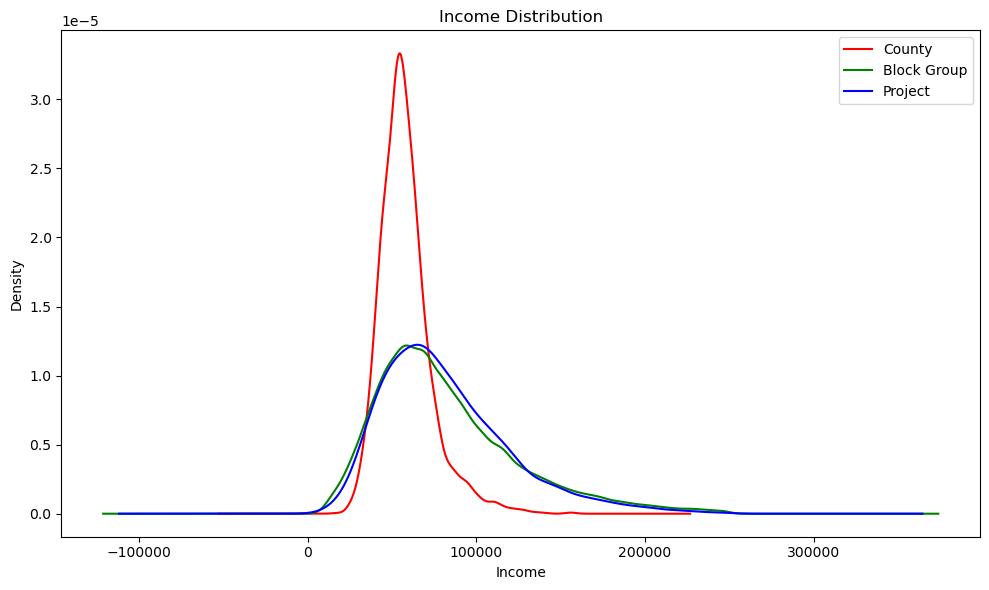

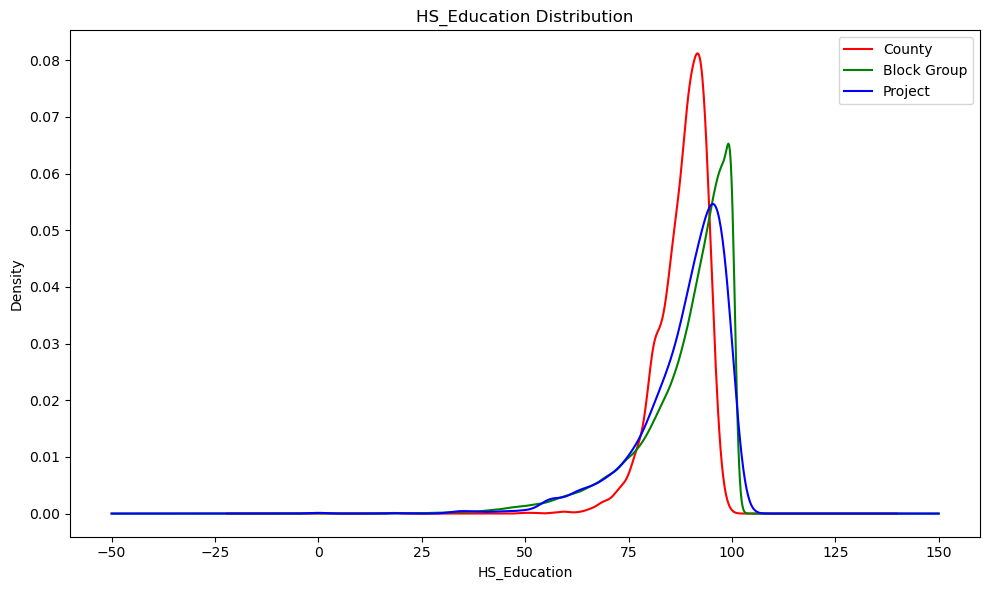

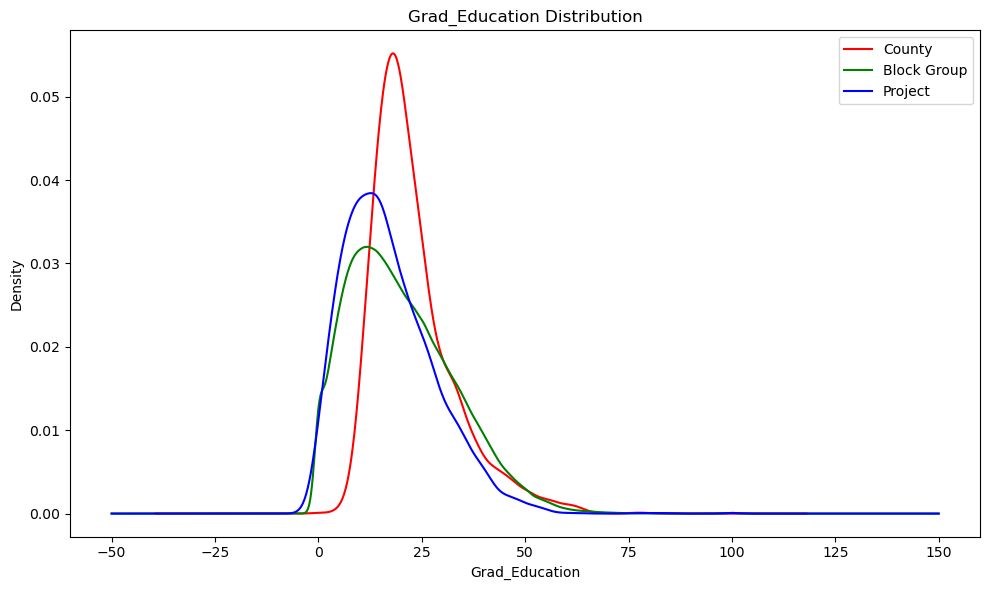

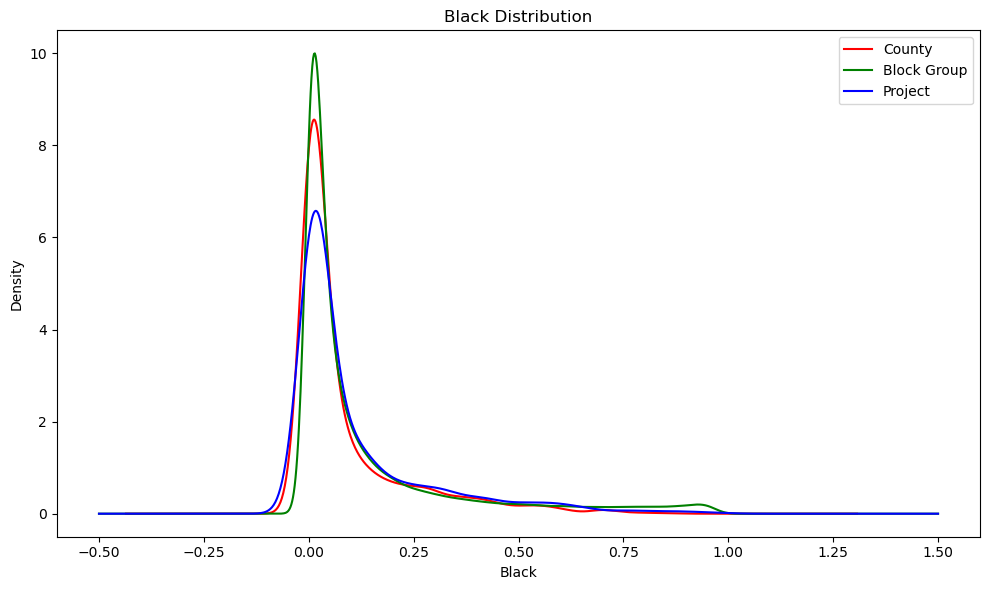

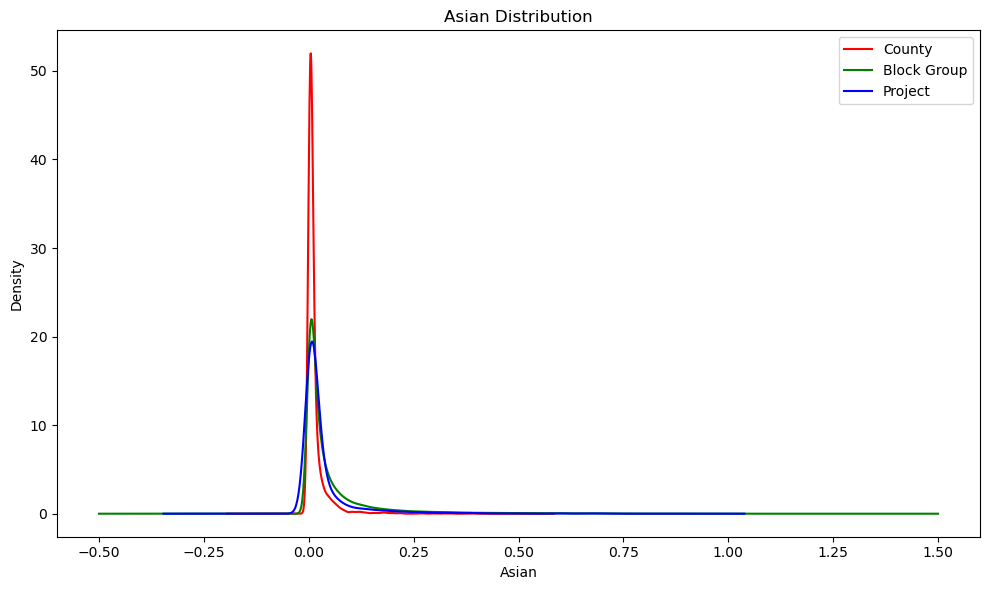

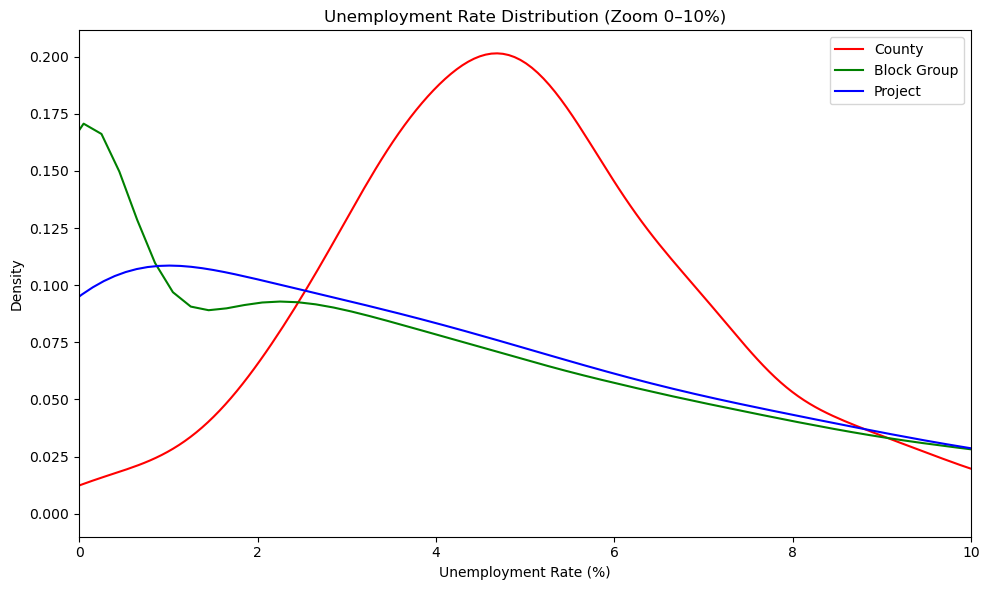

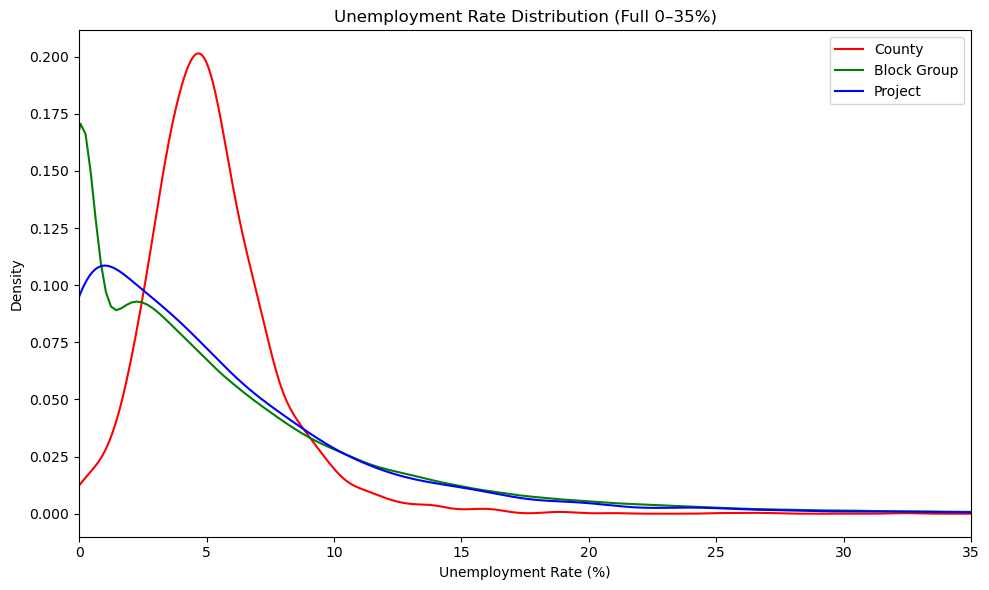

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

factors = ["Income", "HS_Education", "Grad_Education", "Black", "Asian", "Unemployment"]

def safe_series(df, col, *, level=None):
    """
    Returns a numeric Series for KDE plotting, or None if missing / unusable.
    Also fixes unemployment units for BG + Project (0–1 -> 0–100).
    """
    if df is None or col not in df.columns:
        return None

    s = pd.to_numeric(df[col], errors="coerce").dropna()

    # Unit fix: BG + Project unemployment is fraction (0–1), County is percent (0–100)
    if col == "Unemployment" and level in ("bg", "project"):
        s = s * 100

    if len(s) < 10 or s.nunique() < 2:
        return None

    return s

def plot_factor_kde(factor, *, xlim=None, title=None, xlabel=None):
    fig, ax = plt.subplots(figsize=(10, 6))

    cty = safe_series(cty_social_small, factor, level="county")
    bg  = safe_series(bg_social, factor, level="bg")
    prj = safe_series(project_social, factor, level="project") if project_social is not None else None

    # Plot KDE curves 
    if cty is not None:
        cty.plot(kind="kde", ax=ax, color="red", label="County")
    if bg is not None:
        bg.plot(kind="kde", ax=ax, color="green", label="Block Group")
    if prj is not None:
        prj.plot(kind="kde", ax=ax, color="blue", label="Project")

    # Labels/titles
    ax.set_ylabel("Density")
    ax.set_xlabel(xlabel if xlabel is not None else factor)
    ax.set_title(title if title is not None else f"{factor} Distribution")

    if xlim is not None:
        ax.set_xlim(xlim)

    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend()

    plt.tight_layout()
    plt.show()

for factor in ["Income", "HS_Education", "Grad_Education", "Black", "Asian"]:
    plot_factor_kde(factor)

plot_factor_kde(
    "Unemployment",
    xlim=(0, 10),
    title="Unemployment Rate Distribution (Zoom 0–10%)",
    xlabel="Unemployment Rate (%)",
)

plot_factor_kde(
    "Unemployment",
    xlim=(0, 35),
    title="Unemployment Rate Distribution (Full 0–35%)",
    xlabel="Unemployment Rate (%)",
)

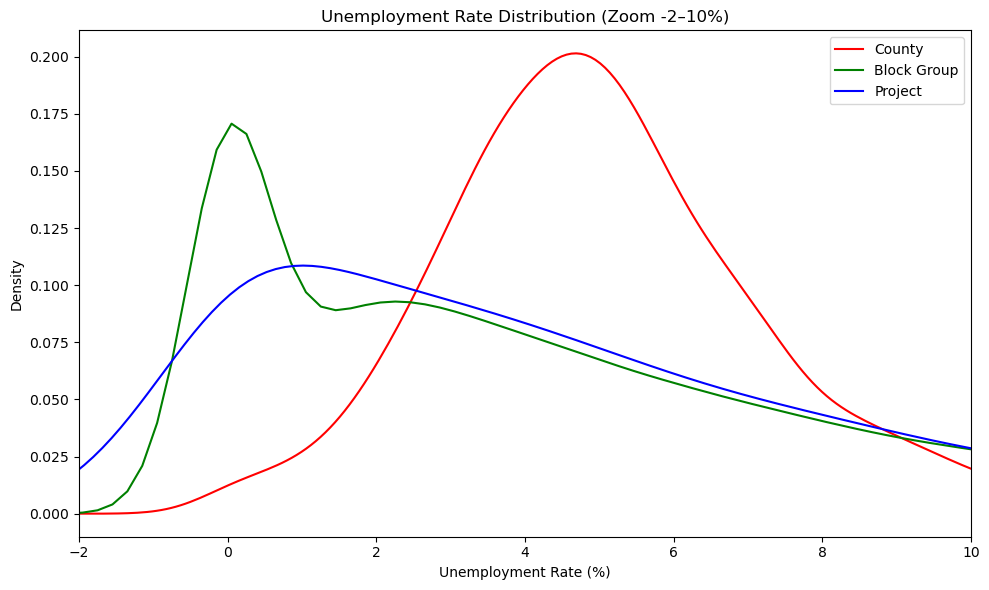

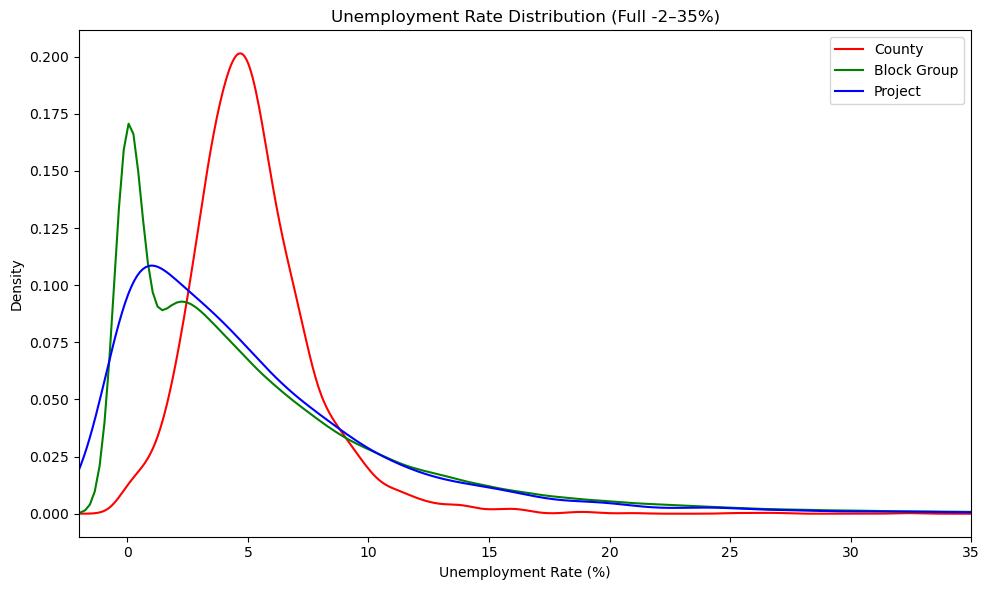

In [ ]:
plot_factor_kde(
    "Unemployment",
    xlim=(-2, 10),
    title="Unemployment Rate Distribution (Zoom -2–10%)",
    xlabel="Unemployment Rate (%)",
)

plot_factor_kde(
    "Unemployment",
    xlim=(-2, 35),
    title="Unemployment Rate Distribution (Full -2–35%)",
    xlabel="Unemployment Rate (%)",
)

In [17]:
def sanity(s, name):
    s = pd.to_numeric(s, errors="coerce")
    print(
        name,
        "min", s.min(),
        "p50", s.quantile(0.5),
        "p90", s.quantile(0.9),
        "max", s.max(),
        "%==0", (s == 0).mean(),
        "%nan", s.isna().mean(),
        "%<=1", (s <= 1).mean(),
        "%<=100", (s <= 100).mean(),
    )

sanity(cty_social["Unemployment Rate"], "County unemp rate")
sanity(bg_unemp["Unemployment Rate"], "BG unemp rate")
sanity(project_social["Unemployment"], "Project unemployment")

County unemp rate min 0.0 p50 4.9 p90 8.2 max 32.4 %==0 0.00704 %nan 0.00608 %<=1 0.02432 %<=100 0.99392
BG unemp rate min 0.0 p50 0.0367647058823529 p90 0.13602589548040253 max 1.0 %==0 0.2163483758087944 %nan 0.010588604251947709 %<=1 0.9894113957480523 %<=100 0.9894113957480523
Project unemployment min 0.0 p50 0.0369420312746801 p90 0.12464541232584421 max 0.6129032258064516 %==0 0.1832602092473844 %nan 0.02531218359770503 %<=1 0.974687816402295 %<=100 0.974687816402295
